In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pykeen
import torch

from pykeen.pipeline import pipeline

In [2]:
dataset = 'WN18RR'
num_epochs = 100
embedding_dim = 64
random_seed = 1234

edge_stalk_sizes = [1,1,1,1,1,1,1,1,1,1,1]
loss = 'SoftplusLoss'
timestr = time.strftime("%Y%m%d-%H%M")

savename = 'SheafE_nonconstant_{}epochs_{}dim_{}loss_{}seed_{}'.format(num_epochs,embedding_dim,loss,random_seed,timestr)
saveloc = os.path.join('/home/gebhart/projects/sheaf_kg/data',dataset,savename)

In [3]:
# ds = pykeen.datasets.get_dataset(dataset=dataset)

# training = ds.training.mapped_triples
# ds.training.mapped_triples = training[training[:,0].sort()[1]]
# testing = ds.testing.mapped_triples
# ds.testing.mapped_triples = testing[testing[:,0].sort()[1]]
# validation = ds.validation.mapped_triples
# ds.validation.mapped_triples = validation[validation[:,0].sort()[1]]
# ds.training.relation_id_to_label

- also_see: both restriction maps are identity
- derivationally_related_form: unconstrained on both sides, or perhaps orthogonality
- has_part: unique projection on both sides
- hypernym: unique projection on both sides
- instance_hypernym: unique projection on both sides
- member_meronym: unique projection on both sides
- member_of_domain_region: unique projection on both sides
- member_of_domain_usage: unique projection on both sides
- similar_to: some sort of minimally-distant/constrained transformation on both sides?
- synset_domain_topic_of: unique projection on both sides
- verb_group: some sort of minimally-distant/constrained transformation on both sides?

In [4]:
import functools
import itertools
from typing import Optional

from pykeen.models import StructuredEmbedding
from pykeen.models.base import EntityEmbeddingModel
from pykeen.nn import Embedding
from pykeen.losses import Loss
from pykeen.nn.init import xavier_uniform_
from pykeen.regularizers import Regularizer
from pykeen.triples import TriplesFactory
from pykeen.typing import DeviceHint
from pykeen.utils import compose

from torch.nn import functional
from torch.nn.parameter import Parameter
from torch import nn

import geotorch

class ModifiedSE(StructuredEmbedding):
    
    def __init__(
        self,
        triples_factory: TriplesFactory,
        embedding_dim: int = 40,
        edge_stalk_sizes: [int] = [40,40,20,20,20,20,20,20,40,20,40],
        alpha: float = 0.1,
        scoring_fct_norm: int = 2,
        loss: Optional[Loss] = None,
        preferred_device: DeviceHint = None,
        random_seed: Optional[int] = None,
        regularizer: Optional[Regularizer] = None,
    ) -> None:
        r"""Initialize SE.

        :param embedding_dim: The entity embedding dimension $d$. Is usually $d \in [50, 300]$.
        :param scoring_fct_norm: The $l_p$ norm. Usually 1 for SE.
        """
        super().__init__(
            triples_factory=triples_factory,
            embedding_dim=embedding_dim,
            loss=loss,
            preferred_device=preferred_device,
            random_seed=random_seed,
            regularizer=regularizer,
        )
                
        self.alpha = alpha
        self.preferred_device = preferred_device
        
        # Embeddings
        init_bound = 6 / np.sqrt(self.embedding_dim)
        
        self.left_embeddings = []
        self.right_embeddings = [] 
    
        # relation 1
        tsize = (edge_stalk_sizes[0],embedding_dim)
#         emb1l = Parameter(nn.init.xavier_uniform_(torch.eye(tsize[0],tsize[1], device=preferred_device)),requires_grad=True)
        emb1l = Parameter(torch.eye(tsize[0],tsize[1], device=preferred_device),requires_grad=False)
        emb1r = emb1l
        self.left_embeddings.append(emb1l)
        self.right_embeddings.append(emb1r)
        
        # relation 2 
        tsize = (edge_stalk_sizes[1],embedding_dim)
        emb2l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)),requires_grad=True)
        emb2r = emb2l
        self.left_embeddings.append(emb2l)
        self.right_embeddings.append(emb2r)
        
        # relation 3
        tsize = (edge_stalk_sizes[2],embedding_dim)
        emb3l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)), requires_grad=True)
        emb3r = emb3l
        self.left_embeddings.append(emb3l)
        self.right_embeddings.append(emb3r)
        
        # relation 4
        tsize = (edge_stalk_sizes[3],embedding_dim)
        emb4l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)), requires_grad=True)
        emb4r = emb4l
        self.left_embeddings.append(emb4l)
        self.right_embeddings.append(emb4r)
        
        # relation 5
        tsize = (edge_stalk_sizes[4],embedding_dim)
        emb5l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)),requires_grad=True)
        emb5r = emb5l
        self.left_embeddings.append(emb5l)
        self.right_embeddings.append(emb5r)
        
        # relation 6
        tsize = (edge_stalk_sizes[5],embedding_dim)
        emb6l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)),requires_grad=True)
        emb6r = emb6l
        self.left_embeddings.append(emb6l)
        self.right_embeddings.append(emb6r)
        
        # relation 7
        tsize = (edge_stalk_sizes[6],embedding_dim)
        emb7l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)),requires_grad=True)
        emb7r = emb7l
        self.left_embeddings.append(emb7l)
        self.right_embeddings.append(emb7r)
        
        # relation 8
        tsize = (edge_stalk_sizes[7],embedding_dim)
        emb8l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)),requires_grad=True)
        emb8r = emb8l
        self.left_embeddings.append(emb8l)
        self.right_embeddings.append(emb8r)
        
        # relation 9
        tsize = (edge_stalk_sizes[8],embedding_dim)
#         emb9l = Parameter(nn.init.xavier_uniform_(torch.eye(tsize[0],tsize[1], device=preferred_device)),requires_grad=True)
        emb9l = Parameter(torch.eye(tsize[0],tsize[1], device=preferred_device),requires_grad=True)
        emb9r = emb9l
        self.left_embeddings.append(emb9l)
        self.right_embeddings.append(emb9r)
        
        # relation 10
        tsize = (edge_stalk_sizes[9],embedding_dim)
        emb10l = Parameter(nn.init.xavier_uniform_(torch.empty(tsize, device=preferred_device)),requires_grad=True)
        emb10r = emb10l
        self.left_embeddings.append(emb10l)
        self.right_embeddings.append(emb10r)
        
        # relation 11
        tsize = (edge_stalk_sizes[10],embedding_dim)
        emb11l = Parameter(torch.eye(tsize[0],tsize[1], device=preferred_device),requires_grad=True)
        emb11r = emb11l
        self.left_embeddings.append(emb11l)
        self.right_embeddings.append(emb11r) 
        
    def score_hrt(self, hrt_batch: torch.LongTensor) -> torch.FloatTensor:  # noqa: D102
        # Get embeddings
        rel_idxs = torch.unique(hrt_batch[:,1])
        scores = torch.zeros(hrt_batch.shape[0], device=self.preferred_device)
        for i in range(rel_idxs.shape[0]):
            ix = rel_idxs[i]
            batch_indices = torch.nonzero(hrt_batch[:,1] == ix)
            batch = hrt_batch[hrt_batch[:,1] == ix]
            h = self.entity_embeddings(indices=batch[:, 0]).view(-1, self.embedding_dim, 1)
            t = self.entity_embeddings(indices=batch[:, 2]).view(-1, self.embedding_dim, 1)
            rel_h = self.left_embeddings[ix]
            rel_t = self.right_embeddings[ix]
            
            proj_h = torch.diagflat(rel_h) @ h
            proj_t = torch.diagflat(rel_t) @ t
            scores[batch_indices] = -torch.norm(proj_h - proj_t, dim=1, p=self.scoring_fct_norm)**2
            
        return scores

    def score_t(self, hr_batch: torch.LongTensor, slice_size: int = None) -> torch.FloatTensor:  # noqa: D102
        # Get embeddings
        rel_idxs = torch.unique(hr_batch[:,1])
        t_all = self.entity_embeddings(indices=None).view(1, -1, self.embedding_dim, 1)
        scores = torch.zeros((hr_batch.shape[0],t_all.shape[1]), device=self.preferred_device)
        for i in range(rel_idxs.shape[0]):
            ix = rel_idxs[i]
            batch_indices = torch.nonzero(hr_batch[:,1] == ix)
            batch = hr_batch[hr_batch[:,1] == ix]
            h = self.entity_embeddings(indices=batch[:, 0]).view(-1, self.embedding_dim, 1)
            rel_h = self.left_embeddings[ix]
            rel_t = self.right_embeddings[ix]
            rel_t = rel_t.view(-1, 1, rel_t.shape[0], rel_t.shape[1])
            
            if slice_size is not None:
                proj_t_arr = []
                # Project entities
                proj_h = rel_h @ h

                for t in torch.split(t_all, slice_size, dim=1):
                    # Project entities
                    proj_t = rel_t @ t
                    proj_t_arr.append(proj_t)
                    
                proj_t = torch.cat(proj_t_arr, dim=1)
                
            else:
                proj_h = torch.diagflat(rel_h) @ h
                proj_t = torch.diagflat(rel_t) @ t_all
                
            scores[batch_indices[:,0]] = -torch.norm(proj_h[:, None, :, 0] - proj_t[:, :, :, 0], dim=-1, p=self.scoring_fct_norm)**2
        
        return scores


    def score_h(self, rt_batch: torch.LongTensor, slice_size: int = None) -> torch.FloatTensor:  # noqa: D102
        # Get embeddings
        rel_idxs = torch.unique(rt_batch[:,0])
        h_all = self.entity_embeddings(indices=None).view(1, -1, self.embedding_dim, 1)
        scores = torch.zeros((rt_batch.shape[0],h_all.shape[1]), device=self.preferred_device)
        for i in range(rel_idxs.shape[0]):
            ix = rel_idxs[i]
            batch_indices = torch.nonzero(rt_batch[:,0] == ix)
            batch = rt_batch[rt_batch[:,0] == ix]
            t = self.entity_embeddings(indices=batch[:, 1]).view(-1, self.embedding_dim, 1)
            rel_h = self.left_embeddings[ix]
            rel_h = rel_h.view(-1, 1, rel_h.shape[0], rel_h.shape[1])
            rel_t = self.right_embeddings[ix]
            
            if slice_size is not None:
                proj_t_arr = []
                # Project entities
                proj_h = rel_h @ h

                for t in torch.split(t_all, slice_size, dim=1):
                    # Project entities
                    proj_t = rel_t @ t
                    proj_t_arr.append(proj_t)
                    
                proj_t = torch.cat(proj_t_arr, dim=1)
                
            else:
                proj_h = torch.diagflat(rel_h) @ h_all
                proj_t = torch.diagflat(rel_t) @ t

            scores[batch_indices[:,0]] = -torch.norm(proj_h[:, :, :, 0] - proj_t[:, None, :, 0], dim=-1, p=self.scoring_fct_norm)**2
        
        return scores

In [5]:
result2 = pipeline(
    model=ModifiedSE,
    dataset=dataset,
    random_seed=random_seed,
    device='gpu',
    training_kwargs=dict(num_epochs=num_epochs),
    evaluation_kwargs=dict(),
    model_kwargs=dict(embedding_dim=embedding_dim, edge_stalk_sizes=edge_stalk_sizes),
    loss=loss,
    training_loop='slcwa',
    loss_kwargs=dict()
)
model2 = result2.model
model2

You're trying to map triples with 212 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 210 from 3134 triples were filtered out
You're trying to map triples with 211 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 210 from 3034 triples were filtered out


INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


INFO:pykeen.evaluation.evaluator:Evaluation took 2.61s seconds


ModifiedSE(
  (loss): SoftplusLoss(
    (softplus): Softplus(beta=1, threshold=20)
  )
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(40559, 64)
  )
  (left_relation_embeddings): Embedding(
    (_embeddings): Embedding(11, 4096)
  )
  (right_relation_embeddings): Embedding(
    (_embeddings): Embedding(11, 4096)
  )
)

In [6]:
transe_results = pipeline(
        dataset=dataset,
        model='TransE',
        random_seed=1235,
        device='gpu',
        training_kwargs=dict(num_epochs=num_epochs),
        model_kwargs=dict(embedding_dim=embedding_dim),
        loss='SoftplusLoss',
        training_loop='slcwa',
        loss_kwargs=dict()
    )

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


INFO:pykeen.evaluation.evaluator:Evaluation took 2.99s seconds


In [7]:
rotate_results = pipeline(
        dataset=dataset,
        model='RotatE',
        random_seed=1235,
        device='gpu',
        training_kwargs=dict(num_epochs=num_epochs),
        model_kwargs=dict(embedding_dim=embedding_dim//2),
        loss='SoftplusLoss',
        training_loop='slcwa',
        loss_kwargs=dict()
    )

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


INFO:pykeen.evaluation.evaluator:Evaluation took 2.36s seconds


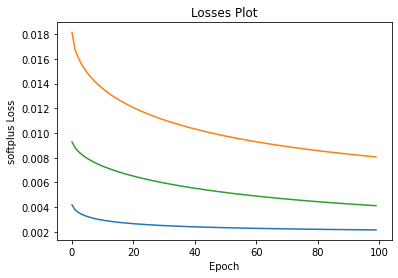

In [8]:
result2.plot_losses()
transe_results.plot_losses()
rotate_results.plot_losses()
plt.show()

In [9]:
res_df = result2.metric_results.to_df()
transe_df = transe_results.metric_results.to_df()
rotate_df = rotate_results.metric_results.to_df()
res_df['transe_diff'] = res_df.Value - transe_df.Value
res_df['rotate_diff'] = res_df.Value - rotate_df.Value

In [10]:
res_df

,Side,Type,Metric,Value,transe_diff,rotate_diff
0,both,avg,adjusted_mean_rank,0.393259,0.059001,-0.316302
1,tail,avg,adjusted_mean_rank,0.340782,0.028858,-0.241986
2,head,avg,adjusted_mean_rank,0.445735,0.089143,-0.390619
3,both,best,mean_rank,7970.756498,1195.256327,-6409.341997
4,both,best,mean_reciprocal_rank,0.143682,0.004546,0.141741
5,both,best,hits_at_1,0.000000,0.000000,-0.000342
6,both,best,hits_at_3,0.274453,0.030096,0.273427
7,both,best,hits_at_5,0.313440,-0.013851,0.311389
8,both,best,hits_at_10,0.341655,-0.049761,0.338919
9,both,worst,mean_rank,7970.760944,1195.253591,-6409.342681


In [11]:

# res_df.to_csv(saveloc+'.csv')
# result2.save_to_directory(saveloc)